# El Algoritmo de K Means

El problema de agrupamiento es uno de los problemas más importantes del reconocimiento de patrones; se trata de encontrar _estructura_ en una colección de datos. Una definición vaga de agrupamiento podría ser “el proceso de organizar objetos en grupos cuyos miembros son similares de alguna manera”. Por lo tanto, un grupo es una colección de objetos que son "similares" entre ellos y son "diferentes" a los objetos que pertenecen a otros grupos. Uno de los algoritmos más usados para resolver este problema es el algoritmo de _K Means_.


## ¿Qué es K Means?

Es un algoritmo para buscar una cantidad, dada por nosotros, de patrones en un conjunto de datos. Este algoritmo aunque es sencillo, es bastante potente por los resultados que genera. Supongamos que tenemos 10,000 datos y tenemos que clasificar cada dato en al menos 5 categorías, encontrando algún criterio de clasificación. Esta tarea tal cual sería super difícil, requeriría muchísimos análisis de distintos tipos para que encontráramos algún patrón, y esto tardaría varios días o semanas. Sin embargo, podemos ejecutar K-Means para que encuentre 5, 6 o tantas clasificaciones como queramos y aunque sean muchos datos, puede encontrar las categorías que deseemos usando criterios _estadísticos_ en su comportamiento. Por esto es un algoritmo muy valorado en la ciencia de datos.


### Entendamos el algoritmo

Antes de programarlo, primero comprendamos conceptualmente cómo funciona el algoritmo de K Means. K means imagina cada grupo como un sistema solar. La estrella alrededor de la que gira todo (todas los datos) en el grupo se conoce como centroide del grupo.

<img src="Kmeans.png">

Entonces, dado un conjunto de $k$ centroides y sus coordenadas, podemos averiguar fácilmente a qué grupo pertenece cada dato calculando a qué centroide está más cerca (en términos de distancia euclidiana).

Pero, ¿cómo decidimos dónde están los centroides? Ahí es donde entra el algoritmo de K means. Primero, elegimos un valor para $k$, el número de centroides, supongamos que $k=3$. Luego, podemos elegir 3 puntos al azar y asignarlos para que sean nuestros centroides iniciales. Y usando nuestros centroides iniciales elegidos al azar, podemos crear 3 grupos. Suena un poco tonto, ¿verdad? ¿De qué sirve elegir centroides aleatorios y crear grupos aleatorios?

Aquí está el truco: las medias de nuestros grupos se convierten en nuestros nuevos centroides (para cada grupo, calculamos la  $x$ media y la $y$ media, y esa es la coordenada de nuestro nuevo centroide). Y siempre que nuestros centroides iniciales seleccionados al azar fueran incluso ligeramente diferentes entre sí, los nuevos centroides (las medias del grupo) serán más óptimos que nuestros centroides iniciales; donde la optimalidad se define como maximizar la similitud dentro del grupo y la diferencia entre los grupos.

Una vez que tenemos nuestros nuevos centroides, podemos reasignar los datos en función de los nuevos centroides. Dado que los centroides se volvieron un poco más óptimos, nuestros grupos también deberían mejorar (en términos de homogeneidad dentro del grupo y varianza entre los grupos). Y ahora podemos volver a calcular nuevos centroides a partir de las medias de las coordenadas de los grupos reasignados. Estos centroides habrán mejorado nuevamente sobre sus predecesores, y podemos seguir repitiendo este proceso hasta que el algoritmo converja.

### Los datos

Para mostrar el algoritmo ocuparemos un conjunto de datos que corresponde a puntos de la forma $(x,y)=(peso, altura)$.



64


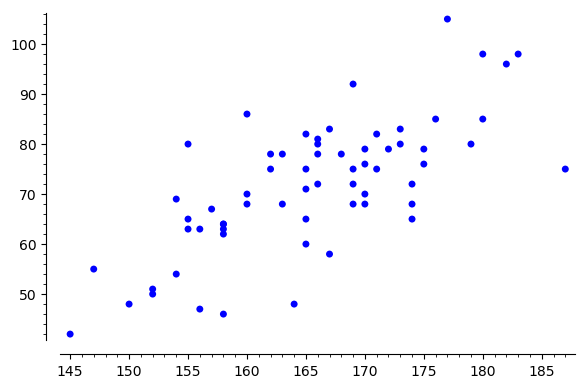

In [1]:
datos=[[158,64],[160,68],[174,72],[165,65],[172,79],[180,98],[163,68],[175,76],[150,48],[171,75],[156,63],[154,54],[174,65],[166,80],[167,83],[155,63],[187,75],[167,58],[182,96],[154,69],[171,82],[168,78],[169,68],[179,80],[152,50],[164,48],[157,67],[160,86],[170,70],[165,60],[183,98],[156,47],[175,79],[173,80],[166,72],[165,71],[174,68],[158,64],[169,75],[169,92],[166,78],[165,75],[145,42],[147,55],[177,105],[176,85],[152,51],[180,85],[170,68],[163,78],[165,82],[170,79],[169,72],[170,76],[162,78],[160,70],[158,63],[162,75],[173,83],[166,81],[158,46],[158,62],[155,80],[155,65]]
print(len(datos))
points(datos, color="blue", size=25)

Y vamos a determinar una variable $K$ que corresponderá al número de categorías que vamos a ocupar para agrupar los datos


In [4]:
K=3

### Centroides aleatorios iniciales

Ahora vamos a generar los centroides iniciales de manera aleatoria. Para esto primero determinaremos los valores mínimos y máximos de $x$ y $y$.

In [2]:
xmin= min ([dato[0]for dato in datos])
xmax= max ([dato[0]for dato in datos])
ymin=min ([dato[1]for dato in datos])
ymax=max ([dato[1]for dato in datos])

Ahora generaremos los centroides de manera aleatoria, para ello generaremos un entero entre el valor mínimo y máximo de $x$ y un entero entre el valor mínimo y máximo de $y$, los juntaremos en un punto, y los pondremos en una lista llamada mu 

In [7]:
mu=[]

for i in srange (K):
    x=randint(xmin,xmax)
    y=randint(ymin,ymax)
    mu.append([x,y])
print(mu)

[[180, 98], [147, 86], [159, 83]]


Veamos donde quedaron los centroides

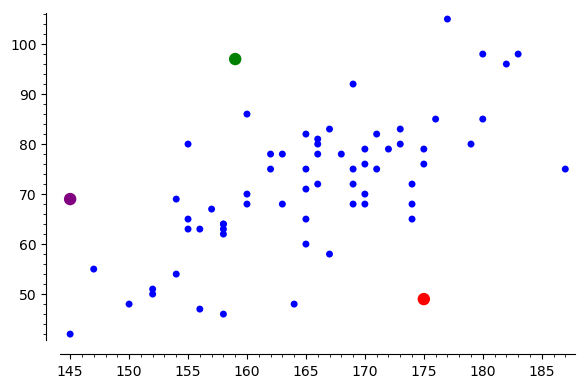

In [6]:
points(datos, color="blue", size=25) +  points(mu[0], color="purple", size=80) +  points(mu[1], color="green", size=80)+  points(mu[2], color="red", size=80)

### Calculando los grupos
Para ayudarnos a calcular los grupos primero hagamos una función que nos diga la distancia (euclidiana) entre dos puntos.

In [11]:
def distancia (P, Q):
    dist=sqrt((P[0]-Q[0])^2+(P[1]-Q[1])^2)
    return dist

Ahora necesitamos una función que, dado un conjunto de centroides, pueda decirnos a qué grupo pertenece cada dato. La siguiente función usa _for_ anidados para calcular la distancia entre cada dato y cada centroide (usando nuestra función _distancia_). Luego, asigna cada dato a un grupo según el centroide al que esté más cercano. El resultado es la lista de las asignaciones de grupo de cada dato.

In [12]:
def asigna_grupos(centroides, datos):
    Grupos=[]
    for i in srange(len(datos)):
        distancias=[]
        for centroide in centroides:
            distancias.append(distancia(centroide,datos[i]))
        grupo=[z for z,val in enumerate(distancias) if val==min(distancias)]
        Grupos.append(grupo[0])
    return Grupos

Llamemos Asignacion a la primera asignación de los datos a los centroides



In [14]:
Asignacion=asigna_grupos(mu, datos)

Ahora en una lista llamada datos_divididos partamos el conjunto de datos de acuerdo con su centroide

In [27]:
datos_divididos=[[datos[i] for i in srange(len(datos)) if Asignacion[i]==j] for j in srange(K)]

Veamos como agrupó los datos



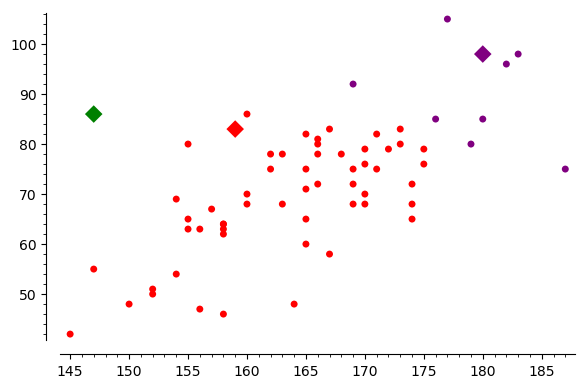

In [18]:
points(mu[0], color="purple", size=80, marker="D") + points(datos_divididos[0], color="purple", size=25) + points(mu[1], color="green", size=80, marker="D") + points(datos_divididos[1], color="green", size=25) +points(mu[2], color="red", size=80, marker="D") + points(datos_divididos[2], color="red", size=25)

### Calculando los nuevos centroides
Ahora necesitamos una función para el paso de actualización donde asignamos nuevos centroides. La siguiente función parte los datos de acuerdo al grupo que pertenecen. Luego toma los datos que pertenecen a un cierto grupo y calcular la media de dichos. Estas medias calculadas serán nuestros nuevos centroides.

In [24]:
def actualiza_centroides(datos, Asignacion, K):
    datos_divididos=[[datos[i] for i in srange(len(datos)) if Asignacion[i]==j]for j in srange(K)]
    nuevos_centroides=[]
    for grupo in datos_divididos:
        valoresx=[dato[0] for dato in grupo]
        valoresy=[dato[1] for dato in grupo]
        centroide=[mean(valoresx),mean(valoresy)]
        nuevos_centroides.append(centroide)
    return nuevos_centroides

Calculamos los nuevos centroides

In [25]:
Mu=actualiza_centroides(datos, Asignacion, K)

Veamos como son los nuevos centroides



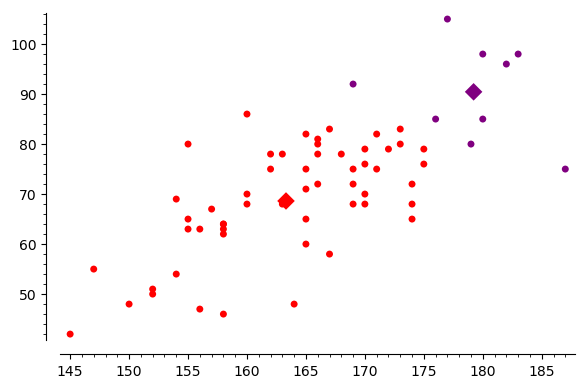

In [26]:
datos_divididos=[ [datos[i] for i in srange(len(datos)) if Asignacion[i]==j  ] for j in srange(K) ]
points(Mu[0], color="purple", size=80, marker="D") + points(datos_divididos[0], color="purple", size=25) + points(Mu[1], color="green", size=80, marker="D") + points(datos_divididos[1], color="green", size=25) +points(Mu[2], color="red", size=80, marker="D") + points(datos_divididos[2], color="red", size=25)

### Corramos K Means

Vayamos con 3 grupos todavía ($K = 3$). Después de esto, ejecutamos un ciclo _for_ 50 veces (50 es suficiente para la convergencia en este caso) donde calculamos repetidamente nuevos centroides (usando actualiza_centroides) y nuevos grupos (usando asignar_grupo) para que podamos obtener grupos óptimos. Recuerda que al repetir este proceso de calcular las medias de los grupos (también conocidos como nuevos centroides) y asignar nuevos grupos basados en estos nuevos centroides, es como el algoritmo converge a los grupos finales. Este proceso puede tardar algunos minutos.



[[156, 86], [159, 82], [169, 55]]


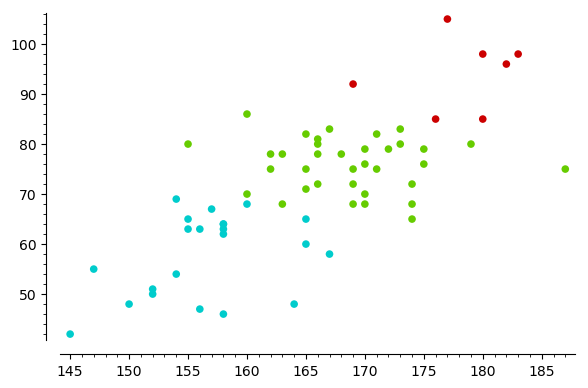

In [31]:
datos=[[158,64],[160,68],[174,72],[165,65],[172,79],[180,98],[163,68],[175,76],[150,48],[171,75],[156,63],[154,54],[174,65],[166,80],[167,83],[155,63],[187,75],[167,58],[182,96],[154,69],[171,82],[168,78],[169,68],[179,80],[152,50],[164,48],[157,67],[160,86],[170,70],[165,60],[183,98],[156,47],[175,79],[173,80],[166,72],[165,71],[174,68],[158,64],[169,75],[169,92],[166,78],[165,75],[145,42],[147,55],[177,105],[176,85],[152,51],[180,85],[170,68],[163,78],[165,82],[170,79],[169,72],[170,76],[162,78],[160,70],[158,63],[162,75],[173,83],[166,81],[158,46],[158,62],[155,80],[155,65]]

K=3

xmin=min ([dato[0] for dato in datos])
xmax=max ([dato[0] for dato in datos])
ymin=min ([dato [1] for dato in datos])
ymax=max ([dato [1] for dato in datos])

mu=[]
for i in srange (K):
    x=randint(xmin,xmax)
    y=randint(ymin,ymax)
    mu.append([x,y])
print (mu)

for i in srange(50):
    Asignacion=asigna_grupos(mu,datos)
    mu=actualiza_centroides(datos, Asignacion,K)

datos_divididos=[[datos[i]for i in srange(len(datos))if Asignacion[i]==j]for j in srange(K)]
dibujo=plot([])
for i in srange(K):
    dibujo=dibujo+points(datos_divididos[i],rgbcolor=hue(1/(K+1)*i,s=1,v=.8), size=30)
dibujo.show()